# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Problem 1: Understanding the Data

To gain a better understanding of the data, please read the information provided in the UCI link above, and examine the **Materials and Methods** section of the paper.  How many marketing campaigns does this data represent?

<b>Answer: </b>The data represents 17 marketing compaigns.

### Problem 2: Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
# import necessary libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import time
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [2]:
df_bank = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


### Problem 3: Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



#### Data overview

In [4]:
df_bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [5]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df_bank.describe(exclude='number')

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


#### Missing data
Our first step is to investigate the data for missing values.

In [7]:
nulls = pd.DataFrame(df_bank.isnull().sum())
nulls = nulls.rename(columns={0: 'Missing count'})
nulls

,Missing count
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


No missing values. However, the some of the categorical, demographic data has "unknown" values.

In [8]:
# find the number of rows with "unknown" in any column, so we can see how much
# we reduce our data by treating them like nulls
unknown_rows_count = df_bank.apply(lambda row: row.str.lower().eq('unknown').any(), axis=1).sum()
print(f'Rows with "unknown": {unknown_rows_count}')

Rows with "unknown": 10700


In [9]:
df_bank.replace("unknown", pd.NA, inplace=True)

In [10]:
nulls = pd.DataFrame(df_bank.isnull().sum())
nulls = nulls.rename(columns={0: 'Missing count'})
nulls

,Missing count
age,0
job,330
marital,80
education,1731
default,8597
housing,990
loan,990
contact,0
month,0
day_of_week,0


In [11]:
df_bank.dropna(inplace=True)

#### Duplicates

In [12]:
duplicates = df_bank[df_bank.duplicated()]

print(f'Duplicates: {duplicates.shape[0]}')

Duplicates: 10


In [13]:
duplicates

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
36951,45,admin.,married,university.degree,no,no,no,cellular,jul,thu,...,1,999,0,nonexistent,-2.9,92.469,-33.6,1.072,5076.2,yes
38281,71,retired,single,university.degree,no,no,no,telephone,oct,tue,...,1,999,0,nonexistent,-3.4,92.431,-26.9,0.742,5017.5,no


In [14]:
# drop duplicates
df_bank.drop_duplicates(inplace=True)

We found 12 duplicates and removed them from the dataset.

#### Duration
The column description for duration indicates it is too highly correlated with the target value, and therefore should be dropped from the analysis.

In [15]:
df_bank.drop(['duration'], axis=1, inplace=True)

In [16]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


#### Further data understanding

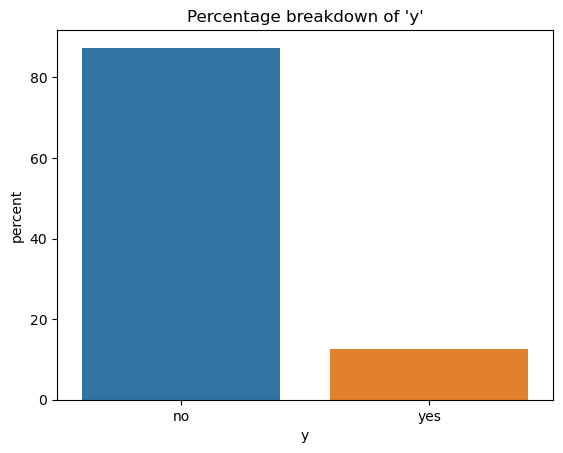

no     0.873417
yes    0.126583
Name: y, dtype: float64

In [17]:
plt.title("Percentage breakdown of 'y'")
sns.countplot(data=df_bank, x='y', hue='y', stat='percent')
plt.show()

df_bank['y'].value_counts(normalize=True)

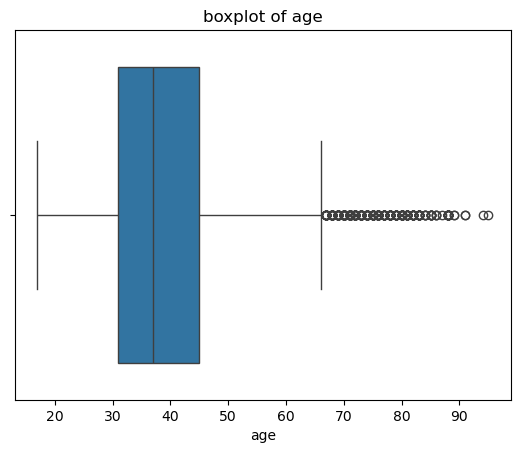

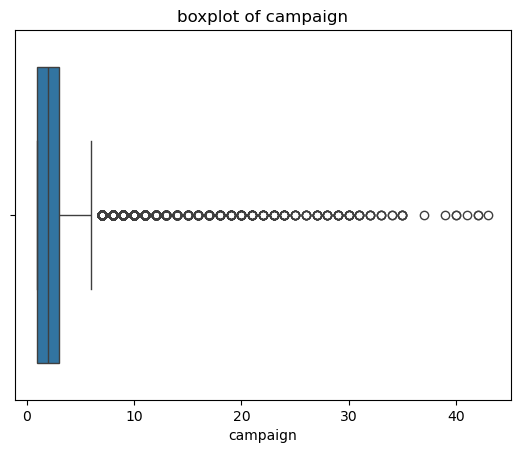

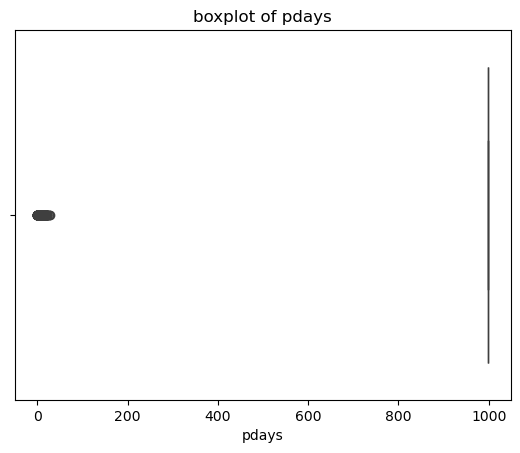

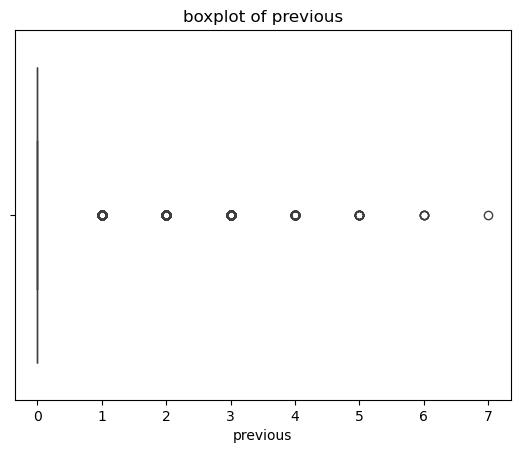

In [18]:
num_columns = ['age', 'campaign','pdays','previous']

for column in num_columns:
    sns.boxplot(x=df_bank[column])
    plt.title(f'boxplot of {column}')
    plt.show()

Some of these numerics have very tight inter quartile ranges, but I am comfortable with the spread because they make sense in context.

The only numeric attribute that needs to be addressed is pdays. pdays has a value of 999 when the consumer has never been contact, but this will cause problems with our model.

We have two options that make sense: We can bin the values, or we can treat these like binary.

Let's see the value counts to determine what to do.

In [19]:
pd.DataFrame(df_bank['pdays'].value_counts(normalize=True)).sort_values(by=['pdays'])

,pdays
27,0.000033
25,0.000033
26,0.000033
21,0.000066
19,0.000098
22,0.000098
18,0.000164
17,0.000197
16,0.000262
8,0.000427


Because 96% of individuals were never contacted (999), then we should just make it binary.

In [20]:
df_bank['contacted'] = (df_bank['pdays'] != 999).astype(int)
df_bank.drop(['pdays'], axis=1, inplace=True)
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,contacted
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,1,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [21]:
df_bank['contacted'].value_counts()

0    29168
1     1310
Name: contacted, dtype: int64

### Problem 4: Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [22]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             30478 non-null  int64  
 1   job             30478 non-null  object 
 2   marital         30478 non-null  object 
 3   education       30478 non-null  object 
 4   default         30478 non-null  object 
 5   housing         30478 non-null  object 
 6   loan            30478 non-null  object 
 7   contact         30478 non-null  object 
 8   month           30478 non-null  object 
 9   day_of_week     30478 non-null  object 
 10  campaign        30478 non-null  int64  
 11  previous        30478 non-null  int64  
 12  poutcome        30478 non-null  object 
 13  emp.var.rate    30478 non-null  float64
 14  cons.price.idx  30478 non-null  float64
 15  cons.conf.idx   30478 non-null  float64
 16  euribor3m       30478 non-null  float64
 17  nr.employed     30478 non-null 

#### Business Objective
An increase in the number of marketing campaigns has decreased their overall effectiveness with the public.
As a response, aggressive, direct marketing campaigns have become more common place.
Our business objective is increase campaign efficiency by building a model that can explain the success of a contact, measured by whether the consumer subscribed to a deposit offered by our bank. According to Problem 5, we will be using the 7 bank column attributes in our modeling to see which of these 7 attributes have an impact on our acceptance rate.

### Problem 5: Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [23]:
# get just the bank features
bank_features = df_bank.iloc[:, 0:7]

# turn the yes/no values into binary for columns 5, 6, and 7, as well as the target
bank_features['default_encoded'] = bank_features['default'].map({'no': 0, 'yes': 1})
bank_features['housing_encoded'] = bank_features['housing'].map({'no': 0, 'yes': 1})
bank_features['loan_encoded'] = bank_features['loan'].map({'no': 0, 'yes': 1})
bank_features.drop(['default', 'housing', 'loan'], axis=1, inplace=True)

df_bank['y_encoded'] = df_bank['y'].map({'no': 0, 'yes': 1})
target = df_bank['y_encoded']

Now we need to use one-hot encoding for columns 2-4 to ensure they are usable in our models.

In [24]:
bank_features_encoded = pd.get_dummies(bank_features, columns=['job', 'marital', 'education'])

In [25]:
bank_features_encoded.head()

,age,default_encoded,housing_encoded,loan_encoded,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_divorced,marital_married,marital_single,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,56,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0,0,0,0,0
2,37,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,40,0,0,0,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4,56,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
6,59,0,0,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


In [26]:
target.value_counts()

0    26620
1     3858
Name: y_encoded, dtype: int64

In [27]:
bank_features_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30478 entries, 0 to 41187
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype
---  ------                         --------------  -----
 0   age                            30478 non-null  int64
 1   default_encoded                30478 non-null  int64
 2   housing_encoded                30478 non-null  int64
 3   loan_encoded                   30478 non-null  int64
 4   job_admin.                     30478 non-null  uint8
 5   job_blue-collar                30478 non-null  uint8
 6   job_entrepreneur               30478 non-null  uint8
 7   job_housemaid                  30478 non-null  uint8
 8   job_management                 30478 non-null  uint8
 9   job_retired                    30478 non-null  uint8
 10  job_self-employed              30478 non-null  uint8
 11  job_services                   30478 non-null  uint8
 12  job_student                    30478 non-null  uint8
 13  job_technician  

### Problem 6: Train/Test Split

With your data prepared, split it into a train and test set.

We need not be concerned with the Curse of Dimensionality given our number of columns (25), and rows (~30,000); we have sufficient amount of data for our number of features.

In [28]:
random_seed = 42

X = bank_features_encoded
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# note that we will need to scale our data in order for the models to work
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Problem 7: A Baseline Model

Before we build our first model, we want to establish a baseline.  What is the baseline performance that our classifier should aim to beat?

In [29]:
# using majority class as baseline
# simple classification model where we predict the majority class
# which in this case is basically the "no's"
majority_class = target.mode().iloc[0]
baseline_accuracy = (target == majority_class).mean()

In [30]:
print(f'Baseline accuracy using majority class: {baseline_accuracy}')

Baseline accuracy using majority class: 0.8734168908721045


### Problem 8: A Simple Model

Use Logistic Regression to build a basic model on your data.  

In [31]:
# build model
lr_bank_model = LogisticRegression()
lr_bank_model.fit(X_train_scaled, y_train)



LogisticRegression()

### Problem 9: Score the Model

What is the accuracy of your model?

In [32]:
# predict
y_pred_lr= lr_bank_model.predict(X_test_scaled)

lr_accuracy = accuracy_score(y_test, y_pred_lr)
print(lr_accuracy)

0.869750656167979


Let's briefly compare our LogisticRegression() value to our baseline.

In [33]:
print(f'LogReg is better than baseline: {lr_accuracy > baseline_accuracy}')
print(f'Difference: {lr_accuracy - baseline_accuracy}')

LogReg is better than baseline: False
Difference: -0.003666234704125526


### Problem 10: Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

#### Logistic Regression (again)
Re-running logistic regression so we can capture training time and accuracy.

In [34]:
# train and calculate training time
lr_bank_model = LogisticRegression()
start = time.time()
lr_bank_model.fit(X_train_scaled, y_train)
end = time.time()
lr_bank_train_time = end - start

# predict with training data. determine accuracy
lr_bank_train_y_pred = lr_bank_model.predict(X_train_scaled)
lr_bank_train_accuracy = accuracy_score(y_train, lr_bank_train_y_pred)

# predict with test data determine accuracy
lr_bank_test_y_pred = lr_bank_model.predict(X_test_scaled)
lr_bank_test_accuracy = accuracy_score(y_test, lr_bank_test_y_pred)


print(lr_bank_train_time, lr_bank_train_accuracy, lr_bank_test_accuracy)

0.01600027084350586 0.8749882816161995 0.869750656167979


#### K Nearest Neighbors

In [35]:
knn_model = KNeighborsClassifier() # five is default per documentation

# train the model and use time to calculate train time
start = time.time()
knn_model.fit(X_train_scaled, y_train)
end = time.time()
knn_train_time = end - start

# predict with training data. determine accuracy
knn_train_y_pred = knn_model.predict(X_train_scaled)
knn_train_accuracy = accuracy_score(y_train, knn_train_y_pred)

# predict with test data determine accuracy
knn_test_y_pred = knn_model.predict(X_test_scaled)
knn_test_accuracy = accuracy_score(y_test, knn_test_y_pred)


print(knn_train_time, knn_train_accuracy, knn_test_accuracy)

0.0030012130737304688 0.8774257054467048 0.8588145231846019


#### Decision Trees

In [36]:
dt_model = DecisionTreeClassifier()

# train the model and use time to calculate train time
start = time.time()
dt_model.fit(X_train_scaled, y_train)
end = time.time()
dt_train_time = end - start

# predict with training data. determine accuracy
dt_train_y_pred = dt_model.predict(X_train_scaled)
dt_train_accuracy = accuracy_score(y_train, dt_train_y_pred)

# predict with test data determine accuracy
dt_test_y_pred = dt_model.predict(X_test_scaled)
dt_test_accuracy = accuracy_score(y_test, dt_test_y_pred)


print(dt_train_time, dt_train_accuracy, dt_test_accuracy)

0.04199552536010742 0.9047529764694854 0.8485345581802275


#### SVM

In [37]:
svc_model = SVC()

# train the model and use time to calculate train time
start = time.time()
svc_model.fit(X_train_scaled, y_train)
end = time.time()
svc_train_time = end - start

# predict with training data. determine accuracy
svc_train_y_pred = svc_model.predict(X_train_scaled)
svc_train_accuracy = accuracy_score(y_train, svc_train_y_pred)

# predict with test data determine accuracy
svc_test_y_pred = svc_model.predict(X_test_scaled)
svc_test_accuracy = accuracy_score(y_test, svc_test_y_pred)


print(svc_train_time, svc_train_accuracy, svc_test_accuracy)

6.613644361495972 0.8755976375738258 0.8693132108486439


#### Consolidate

In [38]:
consolidated_df = pd.DataFrame({
    'Model': ['Baseline', 'Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time': ['N/A', lr_bank_train_time, knn_train_time, dt_train_time, svc_train_time],  
    'Train Accuracy': ['N/A', lr_bank_train_accuracy, knn_train_accuracy, dt_train_accuracy, svc_train_accuracy],  
    'Test Accuracy': [baseline_accuracy, lr_bank_test_accuracy, knn_test_accuracy, dt_test_accuracy, svc_test_accuracy]
})

consolidated_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Baseline,N/A,N/A,0.873417
1,Logistic Regression,0.016,0.874988,0.869751
2,KNN,0.003001,0.877426,0.858815
3,Decision Tree,0.041996,0.904753,0.848535
4,SVM,6.613644,0.875598,0.869313


It's interesting that two of the 4 models do not outperform the baseline while unoptimized.

### Problem 11: Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

The gender feature here might introduce some bias, so we should not include it in the analysis

#### Classification Metric
Though accuracy is the best metric for this analysis, we might want to know which of our models produces the least false positives. The reason being, marketing campaigns are a big investment and we wouldn't want to misspend our funds.

In [39]:
# in case we have a pred set with no 1's, use zero_division
lr_precision = precision_score(y_train, lr_bank_train_y_pred, zero_division=1)
knn_precision = precision_score(y_train, knn_train_y_pred, zero_division=1)
dt_precision = precision_score(y_train, dt_train_y_pred, zero_division=1)
svc_precision = precision_score(y_train, svc_train_y_pred, zero_division=1)

# model on training set

In [40]:
print( lr_precision, knn_precision, dt_precision, svc_precision)

1.0 0.5396341463414634 0.9172141918528253 0.9333333333333333


Logistic Regressions score of 100% suggests there was a zero division, wich means we might not have any "yes's" in the dataset for that one.

Given that, it looks like decision tree has the best recall by far! Explaining why would be an interesting follow-up

#### LogisticRegression Tuned

LogisticRegression has a lot of hyperparameters, so let's use gridsearch to find the best params

In [41]:
# gridsearch
lr_model_tune = LogisticRegression()

# try C hyper parameter
lr_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_search_lr = GridSearchCV(estimator=lr_model_tune, param_grid=lr_param_grid, scoring='accuracy')
grid_search_lr.fit(X_train_scaled, y_train)
lr_c_param = grid_search_lr.best_params_['C']

best_lr = LogisticRegression(C=lr_c_param)

start = time.time()
best_lr.fit(X_train_scaled, y_train)
end = time.time()
lr_best_train_time = end - start

# predict with training data. determine accuracy
lr_best_train_y_pred = best_lr.predict(X_train_scaled)
lr_best_train_accuracy = accuracy_score(y_train, lr_best_train_y_pred)

# predict with test data determine accuracy
lr_best_test_y_pred = best_lr.predict(X_test_scaled)
lr_best_test_accuracy = accuracy_score(y_test, lr_best_test_y_pred)


print(lr_best_train_time, lr_best_train_accuracy, lr_best_test_accuracy)

0.010000228881835938 0.8749882816161995 0.869750656167979


#### KNN Tuned

In [42]:
# tune hyper parameter
knn_model = KNeighborsClassifier() # five is default per documentation
n_neighbors_values = np.linspace(1, 15, 15, dtype=int)
knn_param_grid = {'n_neighbors': n_neighbors_values}
grid_search_knn = GridSearchCV(estimator=knn_model, param_grid=knn_param_grid, scoring='accuracy')
grid_search_knn.fit(X_train_scaled, y_train)
best_n_neighbors = grid_search_knn.best_params_['n_neighbors']

# train the model using best hyperparemeter
best_knn_model = KNeighborsClassifier(n_neighbors=best_n_neighbors)
start = time.time()
best_knn_model.fit(X_train_scaled, y_train)
end = time.time()
knn_best_train_time = end - start

# predict with training data. determine accuracy
knn_best_train_y_pred = best_knn_model.predict(X_train_scaled)
knn_best_train_accuracy = accuracy_score(y_train, knn_best_train_y_pred)

# predict with test data determine accuracy
knn_best_test_y_pred = best_knn_model.predict(X_test_scaled)
knn_best_test_accuracy = accuracy_score(y_test, knn_best_test_y_pred)


print(knn_best_train_time, knn_best_train_accuracy, knn_best_test_accuracy)

0.0030002593994140625 0.8763007406018561 0.8681102362204725


This is a marginal improvement over the original KNN accuracy, but still slightly worse than baseline! This suggests that KNN is not a usefl model for our dataset.

#### Decision Tree Tuned


In [43]:
dt_model_tune = DecisionTreeClassifier()

# tune hyperparameter max_depth
depth_values = np.linspace(1, 20, 20, dtype=int)
dt_param_grid = {
    'max_depth': depth_values
}
grid_search_dt = GridSearchCV(estimator=dt_model_tune, param_grid=dt_param_grid, scoring='accuracy')
grid_search_dt.fit(X_train, y_train)
max_depth_value = grid_search_dt.best_params_['max_depth']
best_dt = DecisionTreeClassifier(max_depth=max_depth_value)

# train the model and use time to calculate train time
start = time.time()
best_dt.fit(X_train_scaled, y_train)
end = time.time()
dt_best_train_time = end - start

# predict with training data. determine accuracy
dt_best_train_y_pred = best_dt.predict(X_train_scaled)
dt_best_train_accuracy = accuracy_score(y_train, dt_best_train_y_pred)

# predict with test data determine accuracy
dt_best_test_y_pred = best_dt.predict(X_test_scaled)
dt_best_test_accuracy = accuracy_score(y_test, dt_best_test_y_pred)


print(dt_best_train_time, dt_best_train_accuracy, dt_best_test_accuracy)

0.005000114440917969 0.8749882816161995 0.869750656167979


#### SVM Tuned

In [44]:
svc_model_tune = SVC()
svc_param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# tune hyperparameter. use cv=3 due to slow performance
grid_search_svc = GridSearchCV(estimator=svc_model_tune, param_grid=svc_param_grid, cv=3, scoring='accuracy', n_jobs=2)
grid_search_svc.fit(X_train, y_train)
svc_c_param = grid_search_svc.best_params_['C']
best_svc_model = SVC(C=svc_c_param)

# train the model and use time to calculate train time
start = time.time()
best_svc_model.fit(X_train_scaled, y_train)
end = time.time()
best_svc_train_time = end - start

# predict with training data. determine accuracy
svc_best_train_y_pred = best_svc_model.predict(X_train_scaled)
svc_best_train_accuracy = accuracy_score(y_train, svc_best_train_y_pred)

# predict with test data determine accuracy
svc_best_test_y_pred = best_svc_model.predict(X_test_scaled)
svc_best_test_accuracy = accuracy_score(y_test, svc_best_test_y_pred)


print(best_svc_train_time, svc_best_train_accuracy, svc_best_test_accuracy)

3.708801031112671 0.8749882816161995 0.869750656167979


#### Consolidated Tuned Metrics

In [45]:
consolidated_tuned_df = pd.DataFrame({
    'Model': ['Baseline', 'Logistic Regression', 'KNN', 'Decision Tree', 'SVM'],
    'Train Time': ['N/A', lr_best_train_time, knn_best_train_time, dt_best_train_time, best_svc_train_time],  
    'Train Accuracy': ['N/A', lr_best_train_accuracy, knn_best_train_accuracy, dt_best_train_accuracy, svc_best_train_accuracy],  
    'Test Accuracy': [baseline_accuracy, lr_best_test_accuracy, knn_best_test_accuracy, dt_best_test_accuracy, svc_best_test_accuracy]
})

consolidated_tuned_df

,Model,Train Time,Train Accuracy,Test Accuracy
0,Baseline,N/A,N/A,0.873417
1,Logistic Regression,0.01,0.874988,0.869751
2,KNN,0.003,0.876301,0.868110
3,Decision Tree,0.005,0.874988,0.869751
4,SVM,3.708801,0.874988,0.869751


In [46]:
print(svc_test_accuracy)
print(dt_test_accuracy)

0.8693132108486439
0.8485345581802275
